In [1]:
import zipfile
!wget https://www.dropbox.com/s/yle22nlwxhgf7pb/color.zip?dl=0&file_subpath=%2Fcolor%2Fexperiment1-dataset-color-of-concrete-objects.txt
# Specify the name of the ZIP file
zip_file = './color.zip?dl=0'

# Specify the directory where you want to extract the contents
extract_path = './'

# Create the directory if it doesn't exist
import os
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'Contents of {zip_file} have been extracted to {extract_path}')
%cd color
import pandas as pd


--2023-11-08 11:56:56--  https://www.dropbox.com/s/yle22nlwxhgf7pb/color.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yle22nlwxhgf7pb/color.zip [following]
--2023-11-08 11:56:57--  https://www.dropbox.com/s/raw/yle22nlwxhgf7pb/color.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdef251d22c0f932f0df024d55d.dl.dropboxusercontent.com/cd/0/inline/CHKlMzQMqJOw8KLEoQuf1M86RiIsiMfFQACIU4HZLWYsJB85MPrap6D4S1BBoAQa-3jkZRQKCkrdrCutI-PgY9obFkJwb9BhnK9NC8YLjDtrp3bpd-dSBnBQiufQDl4TM3s/file# [following]
--2023-11-08 11:56:57--  https://ucdef251d22c0f932f0df024d55d.dl.dropboxusercontent.com/cd/0/inline/CHKlMzQMqJOw8KLEoQuf1M86RiIsiMfFQACIU4HZLWYsJB85MPrap6D4S1BBoAQa-3jkZRQKCkrdrCutI-PgY9obFkJwb9BhnK9NC8YLjDtrp3bpd-dSBnBQiufQDl4

#fastText - En

In [2]:
!pip install nltk
import nltk
nltk.download('wordnet')

#@title ### Load libraries
print('Loading libraries ...')

import os

# Load Pandas for data manipulation and analysis.
try:
    import pandas as pd
except ModuleNotFoundError:
    ! pip install pandas

# Load a data visualization library like Matplotlib
import matplotlib.pyplot as plt
# the following sets inline showing of plots
%matplotlib inline

# Load Scipy and Numpy for conducting statistical tests
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Load the same word2vec model we used in the previous tutorial
from IPython.utils import io
dsm_file = 'cc.en.300.vec.gz'
if not os.path.exists(dsm_file):
  print('Downloading Distributional Semantics model ...')
  with io.capture_output() as captured:
    !wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz' ;
import gensim

print('Loading Distributional Semantic Model ...')
# Loading fastText English word vectors limiting to the first 100K words, using gensim
ds_model = gensim.models.KeyedVectors.load_word2vec_format(dsm_file, limit = 200000)

print('Done!')


[nltk_data] Downloading package wordnet to /root/nltk_data...


Loading libraries ...
Loading Distributional Semantic Model ...
Done!


In [3]:
import pandas as pd

bless = pd.read_csv('experiment1-dataset-color-of-concrete-objects.txt',sep='\t', names =['noun','color'])

In [4]:
bless.head()

,noun,color
0,ash,grey
1,banana,yellow
2,beaver,brown
3,blood,red
4,broccoli,green


In [5]:
def cosine_similarity(noun, color):
    noun_vector = ds_model[noun]
    color_vector = ds_model[color]
    return ds_model.cosine_similarities(noun_vector, [color_vector])[0]

# Add true_similarity column
bless['true_similarity'] = bless.apply(lambda row: cosine_similarity(row['noun'], row['color']), axis=1)

color_list = ['black','blue','brown','green','grey','orange','pink','purple','red','white','yellow']

# For each color, compute the cosine similarity and store in a new column
for color in color_list:
    bless[color] = bless['noun'].apply(lambda noun: cosine_similarity(noun, color))

bless['Max_similarity'] = bless[color_list].max(axis=1)
bless['Max_color'] = bless[color_list].idxmax(axis=1)
bless['accuracy'] = (bless['color'] == bless['Max_color']).astype(int)
bless

,noun,color,true_similarity,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow,Max_similarity,Max_color,accuracy
0,ash,grey,0.338421,0.319593,0.270510,0.373476,0.269521,0.338421,0.321486,0.200154,0.259475,0.294501,0.265377,0.279917,0.373476,brown,0
1,banana,yellow,0.383947,0.284747,0.263512,0.386311,0.346716,0.161395,0.520977,0.330339,0.351893,0.320578,0.269018,0.383947,0.520977,orange,0
2,beaver,brown,0.256803,0.210336,0.177911,0.256803,0.181925,0.153641,0.190796,0.181271,0.136372,0.191488,0.193918,0.136281,0.256803,brown,1
3,blood,red,0.407595,0.255683,0.266980,0.250398,0.198150,0.197225,0.290488,0.250574,0.294620,0.407595,0.313626,0.259952,0.407595,red,1
4,broccoli,green,0.350713,0.180577,0.267677,0.265667,0.350713,0.187463,0.297627,0.321701,0.350442,0.272349,0.248947,0.251240,0.350713,green,1
5,cardboard,brown,0.354025,0.314088,0.252051,0.354025,0.297489,0.243171,0.310386,0.317306,0.268571,0.273169,0.335132,0.347714,0.354025,brown,1
6,carrot,orange,0.460446,0.232724,0.282765,0.268621,0.382615,0.182813,0.460446,0.317066,0.365853,0.341598,0.262766,0.351357,0.460446,orange,1
7,cauliflower,white,0.252908,0.202703,0.254821,0.329872,0.299784,0.202609,0.314982,0.336643,0.377657,0.262839,0.252908,0.282834,0.377657,purple,0
8,cello,brown,0.201281,0.177717,0.157518,0.201281,0.167664,0.115035,0.174922,0.184410,0.206135,0.150802,0.161212,0.157788,0.206135,purple,0
9,chalk,white,0.349913,0.321023,0.343047,0.288606,0.254944,0.309003,0.277160,0.281452,0.305059,0.334594,0.349913,0.304335,0.349913,white,1


In [6]:
overall_accuracy = bless['accuracy'].sum() / len(bless)

print(f"Overall Accuracy: {overall_accuracy:.2%}")

Overall Accuracy: 50.00%


In [7]:
def second_largest(row, columns):
    sorted_row = row[columns].sort_values(ascending=False)

    # If the primary prediction is correct, return the top value (i.e., retain the primary prediction)
    if row['accuracy'] == 1:
        max_color = sorted_row.index[0]
        max_value = sorted_row.iloc[0]
        return pd.Series([max_value, max_color])

    # If the primary prediction is not correct, return the actual second best value
    else:
        second_max_color = sorted_row.index[1]
        second_max_value = sorted_row.iloc[1]
        return pd.Series([second_max_value, second_max_color])

bless[['Second_Max_similarity', 'Second_Max_color']] = bless.apply(lambda row: second_largest(row, color_list), axis=1)
bless['Second_accuracy'] = (bless['color'] == bless['Second_Max_color']).astype(int)


In [8]:
overall_accuracy = bless['Second_accuracy'].sum() / len(bless)

print(f"Overall Accuracy: {overall_accuracy:.2%}")

Overall Accuracy: 69.23%


In [9]:
# For each row, rank the cosine similarities and determine the rank of the true color
ranks = []
for index, row in bless.iterrows():
    ranked_colors = row[color_list].sort_values(ascending=False).index.tolist()
    rank_of_true_color = ranked_colors.index(row['color']) + 1
    ranks.append(rank_of_true_color)

# Add ranks to the dataframe
bless['rank'] = ranks

# Calculate median rank
median_rank = pd.Series(ranks).median()

print("Median Rank:", median_rank)

Median Rank: 1.5


In [10]:
results_english = bless

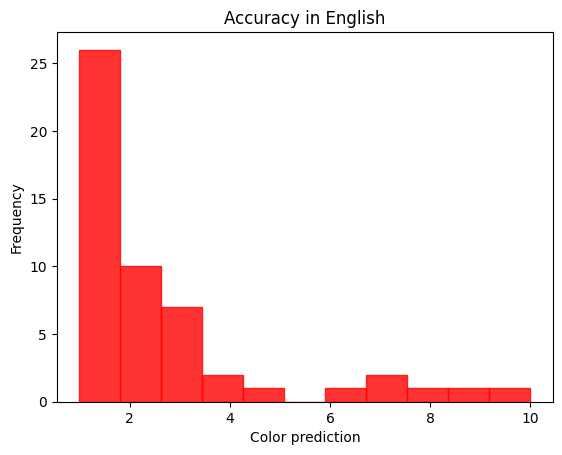

In [11]:
plt.hist(results_english['rank'], bins=len(color_list),edgecolor='red', color='red',alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Color prediction')
plt.title('Accuracy in English')
plt.show()

#Spanish


In [12]:
import pandas as pd
df = pd.read_csv('experiment1-dataset-color-of-concrete-objects.txt',sep='\t', names =['noun','color'])

In [13]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 872.6 kB/s eta 0:00:00


In [14]:
from deep_translator import GoogleTranslator
to_translate = 'I want to translate this text'
def translate_text(text):
  return GoogleTranslator(source='auto', target='es').translate(text)
# outpout -> Ich möchte diesen Text übersetzen

In [15]:
#from googletrans import Translator

def translate_column_to_spanish(df, column_name1, column_name2):
    # Initialize the translator


    # Translate the words in the specified column to Spanish
    df['nombre_esp'] = df[column_name1].apply(lambda text: translate_text(text,))
    df['color_esp'] = df[column_name2].apply(lambda text: translate_text(text,))

    return df


# Call the translate_column_to_spanish function
translated_df = translate_column_to_spanish(df, 'noun', 'color')


# Display the translated DataFrame
print(translated_df)


           noun   color   nombre_esp color_esp
0           ash    grey       ceniza      gris
1        banana  yellow       banana  amarillo
2        beaver   brown       castor    marrón
3         blood     red       sangre      rojo
4      broccoli   green      brócoli     verde
5     cardboard   brown    cartulina    marrón
6        carrot  orange    zanahoria   naranja
7   cauliflower   white     coliflor    blanco
8         cello   brown  violonchelo    marrón
9         chalk   white         tiza    blanco
10       cherry     red       cereza      rojo
11        cloud   white         nube    blanco
12       clover   green       trébol     verde
13         coal   black       carbón     negro
14    cockroach   brown    cucaracha    marrón
15       coffee   brown         café    marrón
16         corn  yellow         maíz  amarillo
17       cotton   white      algodón    blanco
18         crow   black       cuervo     negro
19         deer   brown       ciervo    marrón
20      dolph

In [16]:
unique_colors = translated_df['color_esp'].unique()

In [17]:
unique_colors

array(['gris', 'amarillo', 'marrón', 'rojo', 'verde', 'naranja', 'blanco',
       'negro', 'rosa', 'azul'], dtype=object)

In [18]:
bless = translated_df

In [19]:
!pip install nltk
import nltk
nltk.download('wordnet')

#@title ### Load libraries
print('Loading libraries ...')

import os

# Load Pandas for data manipulation and analysis.
try:
    import pandas as pd
except ModuleNotFoundError:
    ! pip install pandas

# Load a data visualization library like Matplotlib
import matplotlib.pyplot as plt
# the following sets inline showing of plots
%matplotlib inline

# Load Scipy and Numpy for conducting statistical tests
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Load the same word2vec model we used in the previous tutorial
from IPython.utils import io
dsm_file = 'cc.es.300.vec.gz'
if not os.path.exists(dsm_file):
  print('Downloading Distributional Semantics model ...')
  with io.capture_output() as captured:
    !wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz' ;
import gensim

print('Loading Distributional Semantic Model ...')
# Loading fastText English word vectors limiting to the first 100K words, using gensim
ds_model = gensim.models.KeyedVectors.load_word2vec_format(dsm_file, limit = 200000)

print('Done!')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading libraries ...
Loading Distributional Semantic Model ...
Done!


In [20]:
def cosine_similarity(noun, color):
    noun_vector = ds_model[noun]
    color_vector = ds_model[color]
    return ds_model.cosine_similarities(noun_vector, [color_vector])[0]

# Add true_similarity column
bless['true_similarity'] = bless.apply(lambda row: cosine_similarity(row['nombre_esp'], row['color_esp']), axis=1)

color_list = ['gris', 'amarillo', 'marrón', 'rojo', 'verde', 'naranja', 'blanco', 'negro', 'rosa', 'azul']

# For each color, compute the cosine similarity and store in a new column
for color in color_list:
    bless[color] = bless['nombre_esp'].apply(lambda noun: cosine_similarity(noun, color))

bless['Max_similarity'] = bless[color_list].max(axis=1)
bless['Max_color'] = bless[color_list].idxmax(axis=1)
bless['accuracy'] = (bless['color_esp'] == bless['Max_color']).astype(int)
bless

,noun,color,nombre_esp,color_esp,true_similarity,gris,amarillo,marrón,rojo,verde,naranja,blanco,negro,rosa,azul,Max_similarity,Max_color,accuracy
0,ash,grey,ceniza,gris,0.453178,0.453178,0.371235,0.377796,0.368377,0.344998,0.309007,0.356486,0.352610,0.371429,0.354622,0.453178,gris,1
1,banana,yellow,banana,amarillo,0.351373,0.243600,0.351373,0.394497,0.265264,0.326700,0.511483,0.214914,0.264708,0.293585,0.279102,0.511483,naranja,0
2,beaver,brown,castor,marrón,0.294476,0.205807,0.255659,0.294476,0.260572,0.248669,0.262903,0.222700,0.224131,0.262966,0.218864,0.294476,marrón,1
3,blood,red,sangre,rojo,0.397567,0.254131,0.289130,0.293330,0.397567,0.297529,0.286654,0.309355,0.328574,0.337671,0.377406,0.397567,rojo,1
4,broccoli,green,brócoli,verde,0.379246,0.217107,0.347767,0.252508,0.304493,0.379246,0.374224,0.256461,0.201238,0.288347,0.279079,0.379246,verde,1
5,cardboard,brown,cartulina,marrón,0.379926,0.311115,0.338886,0.379926,0.289614,0.315775,0.337270,0.377556,0.294732,0.393017,0.355919,0.393017,rosa,0
6,carrot,orange,zanahoria,naranja,0.567524,0.202691,0.331167,0.355190,0.282237,0.394956,0.567524,0.242159,0.248267,0.425106,0.277373,0.567524,naranja,1
7,cauliflower,white,coliflor,blanco,0.225117,0.225158,0.255938,0.284019,0.212358,0.309229,0.380869,0.225117,0.153917,0.332004,0.199893,0.380869,naranja,0
8,cello,brown,violonchelo,marrón,0.140515,0.092192,0.079117,0.140515,0.118298,0.043980,0.116034,0.127663,0.136781,0.192524,0.161229,0.192524,rosa,0
9,chalk,white,tiza,blanco,0.376119,0.398344,0.343139,0.387931,0.342158,0.378727,0.358606,0.376119,0.335490,0.370156,0.402438,0.402438,azul,0


In [21]:
overall_accuracy = bless['accuracy'].sum() / len(bless)

print(f"Overall Accuracy: {overall_accuracy:.2%}")

Overall Accuracy: 42.31%


In [22]:
def second_largest(row, columns):
    sorted_row = row[columns].sort_values(ascending=False)

    # If the primary prediction is correct, return the top value (i.e., retain the primary prediction)
    if row['accuracy'] == 1:
        max_color = sorted_row.index[0]
        max_value = sorted_row.iloc[0]
        return pd.Series([max_value, max_color])

    # If the primary prediction is not correct, return the actual second best value
    else:
        second_max_color = sorted_row.index[1]
        second_max_value = sorted_row.iloc[1]
        return pd.Series([second_max_value, second_max_color])

bless[['Second_Max_similarity', 'Second_Max_color']] = bless.apply(lambda row: second_largest(row, color_list), axis=1)
bless['Second_accuracy'] = (bless['color_esp'] == bless['Second_Max_color']).astype(int)


In [23]:
overall_accuracy = bless['Second_accuracy'].sum() / len(bless)

print(f"Second Accuracy: {overall_accuracy:.2%}")

Second Accuracy: 53.85%


In [24]:
# For each row, rank the cosine similarities and determine the rank of the true color
ranks = []
for index, row in bless.iterrows():
    ranked_colors = row[color_list].sort_values(ascending=False).index.tolist()
    rank_of_true_color = ranked_colors.index(row['color_esp']) + 1
    ranks.append(rank_of_true_color)

# Add ranks to the dataframe
bless['rank'] = ranks

# Calculate median rank
median_rank = pd.Series(ranks).median()

print("Median Rank:", median_rank)

Median Rank: 2.0


In [25]:
results_spanish = bless

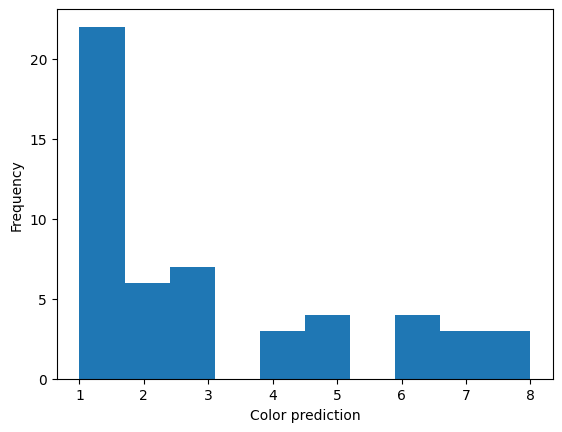

In [26]:
plt.hist(bless['rank'], bins=len(color_list))
plt.ylabel('Frequency')
plt.xlabel('Color prediction')
plt.show()

# Results comparison

In [27]:
results_spanish

,noun,color,nombre_esp,color_esp,true_similarity,gris,amarillo,marrón,rojo,verde,...,negro,rosa,azul,Max_similarity,Max_color,accuracy,Second_Max_similarity,Second_Max_color,Second_accuracy,rank
0,ash,grey,ceniza,gris,0.453178,0.453178,0.371235,0.377796,0.368377,0.344998,...,0.352610,0.371429,0.354622,0.453178,gris,1,0.453178,gris,1,1
1,banana,yellow,banana,amarillo,0.351373,0.243600,0.351373,0.394497,0.265264,0.326700,...,0.264708,0.293585,0.279102,0.511483,naranja,0,0.394497,marrón,0,3
2,beaver,brown,castor,marrón,0.294476,0.205807,0.255659,0.294476,0.260572,0.248669,...,0.224131,0.262966,0.218864,0.294476,marrón,1,0.294476,marrón,1,1
3,blood,red,sangre,rojo,0.397567,0.254131,0.289130,0.293330,0.397567,0.297529,...,0.328574,0.337671,0.377406,0.397567,rojo,1,0.397567,rojo,1,1
4,broccoli,green,brócoli,verde,0.379246,0.217107,0.347767,0.252508,0.304493,0.379246,...,0.201238,0.288347,0.279079,0.379246,verde,1,0.379246,verde,1,1
5,cardboard,brown,cartulina,marrón,0.379926,0.311115,0.338886,0.379926,0.289614,0.315775,...,0.294732,0.393017,0.355919,0.393017,rosa,0,0.379926,marrón,1,2
6,carrot,orange,zanahoria,naranja,0.567524,0.202691,0.331167,0.355190,0.282237,0.394956,...,0.248267,0.425106,0.277373,0.567524,naranja,1,0.567524,naranja,1,1
7,cauliflower,white,coliflor,blanco,0.225117,0.225158,0.255938,0.284019,0.212358,0.309229,...,0.153917,0.332004,0.199893,0.380869,naranja,0,0.332004,rosa,0,7
8,cello,brown,violonchelo,marrón,0.140515,0.092192,0.079117,0.140515,0.118298,0.043980,...,0.136781,0.192524,0.161229,0.192524,rosa,0,0.161229,azul,0,3
9,chalk,white,tiza,blanco,0.376119,0.398344,0.343139,0.387931,0.342158,0.378727,...,0.335490,0.370156,0.402438,0.402438,azul,0,0.398344,gris,0,5


In [28]:
results_english

,noun,color,true_similarity,black,blue,brown,green,grey,orange,pink,...,red,white,yellow,Max_similarity,Max_color,accuracy,Second_Max_similarity,Second_Max_color,Second_accuracy,rank
0,ash,grey,0.338421,0.319593,0.270510,0.373476,0.269521,0.338421,0.321486,0.200154,...,0.294501,0.265377,0.279917,0.373476,brown,0,0.338421,grey,1,2
1,banana,yellow,0.383947,0.284747,0.263512,0.386311,0.346716,0.161395,0.520977,0.330339,...,0.320578,0.269018,0.383947,0.520977,orange,0,0.386311,brown,0,3
2,beaver,brown,0.256803,0.210336,0.177911,0.256803,0.181925,0.153641,0.190796,0.181271,...,0.191488,0.193918,0.136281,0.256803,brown,1,0.256803,brown,1,1
3,blood,red,0.407595,0.255683,0.266980,0.250398,0.198150,0.197225,0.290488,0.250574,...,0.407595,0.313626,0.259952,0.407595,red,1,0.407595,red,1,1
4,broccoli,green,0.350713,0.180577,0.267677,0.265667,0.350713,0.187463,0.297627,0.321701,...,0.272349,0.248947,0.251240,0.350713,green,1,0.350713,green,1,1
5,cardboard,brown,0.354025,0.314088,0.252051,0.354025,0.297489,0.243171,0.310386,0.317306,...,0.273169,0.335132,0.347714,0.354025,brown,1,0.354025,brown,1,1
6,carrot,orange,0.460446,0.232724,0.282765,0.268621,0.382615,0.182813,0.460446,0.317066,...,0.341598,0.262766,0.351357,0.460446,orange,1,0.460446,orange,1,1
7,cauliflower,white,0.252908,0.202703,0.254821,0.329872,0.299784,0.202609,0.314982,0.336643,...,0.262839,0.252908,0.282834,0.377657,purple,0,0.336643,pink,0,9
8,cello,brown,0.201281,0.177717,0.157518,0.201281,0.167664,0.115035,0.174922,0.184410,...,0.150802,0.161212,0.157788,0.206135,purple,0,0.201281,brown,1,2
9,chalk,white,0.349913,0.321023,0.343047,0.288606,0.254944,0.309003,0.277160,0.281452,...,0.334594,0.349913,0.304335,0.349913,white,1,0.349913,white,1,1


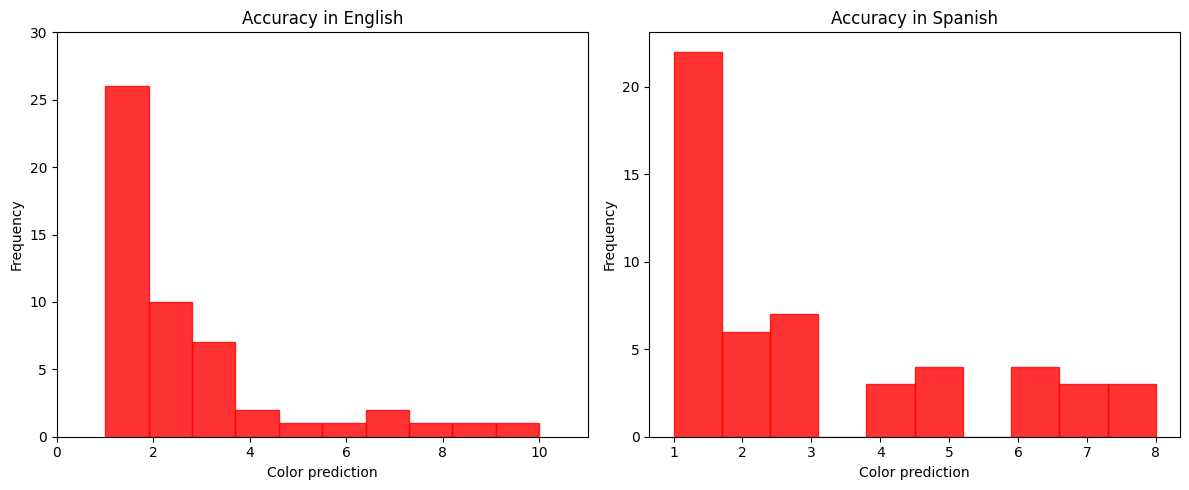

In [29]:
x_range = range(1, 11)
y_range = range(0,28)
plt.figure(figsize=(12, 5))  #plt size
plt.subplot(1, 2, 1)  #1 row 2 columns 1st plot
plt.hist(results_english['rank'], bins=x_range,edgecolor='#C60C27', color='#C60C27',alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Color prediction')
plt.title('Accuracy in English')
plt.ylim(0, 28)
plt.subplot(1,2,2)
plt.hist(results_spanish['rank'], bins=x_range,edgecolor='#C60C27', color='#C60C27',alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Color prediction')
plt.title('Accuracy in Spanish')
plt.ylim(0, 28)
plt.tight_layout()
plt.savefig('Accuracy.png')
plt.show()

In [30]:
from google.colab import files
files.download('Accuracy.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
matching_rows_es = results_spanish[results_english['accuracy'] == results_spanish['accuracy']]
matching_rows_es.reset_index(drop=True)
matching_rows_es = matching_rows_es[matching_rows_es['accuracy'] == 1]
matching_rows_es

,noun,color,nombre_esp,color_esp,true_similarity,gris,amarillo,marrón,rojo,verde,...,negro,rosa,azul,Max_similarity,Max_color,accuracy,Second_Max_similarity,Second_Max_color,Second_accuracy,rank
2,beaver,brown,castor,marrón,0.294476,0.205807,0.255659,0.294476,0.260572,0.248669,...,0.224131,0.262966,0.218864,0.294476,marrón,1,0.294476,marrón,1,1
3,blood,red,sangre,rojo,0.397567,0.254131,0.289130,0.293330,0.397567,0.297529,...,0.328574,0.337671,0.377406,0.397567,rojo,1,0.397567,rojo,1,1
4,broccoli,green,brócoli,verde,0.379246,0.217107,0.347767,0.252508,0.304493,0.379246,...,0.201238,0.288347,0.279079,0.379246,verde,1,0.379246,verde,1,1
6,carrot,orange,zanahoria,naranja,0.567524,0.202691,0.331167,0.355190,0.282237,0.394956,...,0.248267,0.425106,0.277373,0.567524,naranja,1,0.567524,naranja,1,1
17,cotton,white,algodón,blanco,0.404358,0.351511,0.358353,0.388830,0.301161,0.305772,...,0.377393,0.369630,0.354506,0.404358,blanco,1,0.404358,blanco,1,1
18,crow,black,cuervo,negro,0.387706,0.300522,0.330743,0.310296,0.328043,0.278818,...,0.387706,0.287199,0.367137,0.387706,negro,1,0.387706,negro,1,1
24,fog,grey,niebla,gris,0.442481,0.442481,0.270060,0.254305,0.236217,0.324859,...,0.269363,0.285720,0.374940,0.442481,gris,1,0.442481,gris,1,1
25,forest,green,bosque,verde,0.396225,0.262207,0.264043,0.273326,0.278690,0.396225,...,0.226715,0.263417,0.297576,0.396225,verde,1,0.396225,verde,1,1
29,gorilla,black,gorila,negro,0.400608,0.318677,0.280907,0.350107,0.301497,0.276808,...,0.400608,0.278176,0.276695,0.400608,negro,1,0.400608,negro,1,1
30,grass,green,césped,verde,0.440685,0.293079,0.300821,0.303644,0.269976,0.440685,...,0.232633,0.291544,0.324927,0.440685,verde,1,0.440685,verde,1,1


In [32]:
matching_rows_en = results_english[results_english['accuracy'] == results_spanish['accuracy']]
matching_rows_en.reset_index(drop=True)
matching_rows_en = matching_rows_en[matching_rows_en['accuracy'] == 1]
matching_rows_en

,noun,color,true_similarity,black,blue,brown,green,grey,orange,pink,...,red,white,yellow,Max_similarity,Max_color,accuracy,Second_Max_similarity,Second_Max_color,Second_accuracy,rank
2,beaver,brown,0.256803,0.210336,0.177911,0.256803,0.181925,0.153641,0.190796,0.181271,...,0.191488,0.193918,0.136281,0.256803,brown,1,0.256803,brown,1,1
3,blood,red,0.407595,0.255683,0.266980,0.250398,0.198150,0.197225,0.290488,0.250574,...,0.407595,0.313626,0.259952,0.407595,red,1,0.407595,red,1,1
4,broccoli,green,0.350713,0.180577,0.267677,0.265667,0.350713,0.187463,0.297627,0.321701,...,0.272349,0.248947,0.251240,0.350713,green,1,0.350713,green,1,1
6,carrot,orange,0.460446,0.232724,0.282765,0.268621,0.382615,0.182813,0.460446,0.317066,...,0.341598,0.262766,0.351357,0.460446,orange,1,0.460446,orange,1,1
17,cotton,white,0.383891,0.351267,0.303966,0.294174,0.283763,0.296095,0.283150,0.321138,...,0.269954,0.383891,0.301273,0.383891,white,1,0.383891,white,1,1
18,crow,black,0.295427,0.295427,0.239080,0.264359,0.212137,0.255771,0.198749,0.164767,...,0.272511,0.243320,0.197224,0.295427,black,1,0.295427,black,1,1
24,fog,grey,0.369985,0.258503,0.321829,0.238216,0.239844,0.369985,0.227837,0.222146,...,0.271483,0.300003,0.246983,0.369985,grey,1,0.369985,grey,1,1
25,forest,green,0.354832,0.208648,0.199089,0.247497,0.354832,0.243018,0.184078,0.160198,...,0.198783,0.192171,0.177891,0.354832,green,1,0.354832,green,1,1
29,gorilla,black,0.313008,0.313008,0.181411,0.230009,0.136785,0.180696,0.238353,0.238629,...,0.176266,0.278348,0.186143,0.313008,black,1,0.313008,black,1,1
30,grass,green,0.469559,0.238718,0.308099,0.327165,0.469559,0.297582,0.303114,0.276921,...,0.268739,0.275935,0.358111,0.469559,green,1,0.469559,green,1,1


In [33]:
print("Percentage agree:", len(matching_rows_en) /len(results_english))

Percentage agree: 0.2692307692307692


In [34]:
matching_rows_en = results_english[results_english['accuracy'] == results_spanish['accuracy']]
matching_rows_en.reset_index(drop=True)
matching_rows_en = matching_rows_en[matching_rows_en['accuracy'] == 0]
matching_rows_en

,noun,color,true_similarity,black,blue,brown,green,grey,orange,pink,...,red,white,yellow,Max_similarity,Max_color,accuracy,Second_Max_similarity,Second_Max_color,Second_accuracy,rank
1,banana,yellow,0.383947,0.284747,0.263512,0.386311,0.346716,0.161395,0.520977,0.330339,...,0.320578,0.269018,0.383947,0.520977,orange,0,0.386311,brown,0,3
7,cauliflower,white,0.252908,0.202703,0.254821,0.329872,0.299784,0.202609,0.314982,0.336643,...,0.262839,0.252908,0.282834,0.377657,purple,0,0.336643,pink,0,9
8,cello,brown,0.201281,0.177717,0.157518,0.201281,0.167664,0.115035,0.174922,0.184410,...,0.150802,0.161212,0.157788,0.206135,purple,0,0.201281,brown,1,2
10,cherry,red,0.424861,0.338512,0.369937,0.377873,0.324009,0.281470,0.434828,0.425502,...,0.424861,0.319656,0.371573,0.434828,orange,0,0.425502,pink,0,3
11,cloud,white,0.260504,0.278585,0.230290,0.192001,0.256890,0.302682,0.205758,0.251662,...,0.216269,0.260504,0.223166,0.302682,grey,0,0.278585,black,0,4
19,deer,brown,0.256962,0.225677,0.199855,0.256962,0.236658,0.190402,0.219906,0.212414,...,0.266294,0.226464,0.172779,0.266294,red,0,0.256962,brown,1,2
20,dolphin,grey,0.199024,0.183788,0.288274,0.190501,0.193087,0.199024,0.220643,0.288358,...,0.192881,0.196470,0.210516,0.288358,pink,0,0.288274,blue,0,6
21,elephant,grey,0.226254,0.297365,0.226804,0.263849,0.228501,0.226254,0.228686,0.313868,...,0.233134,0.321041,0.225792,0.321041,white,0,0.313868,pink,0,10
22,flour,white,0.281436,0.190957,0.140233,0.323968,0.141529,0.142063,0.192790,0.142106,...,0.158836,0.281436,0.190365,0.323968,brown,0,0.281436,white,1,2
23,foam,white,0.290177,0.207708,0.268881,0.265814,0.272857,0.230942,0.309430,0.318915,...,0.272112,0.290177,0.292770,0.318915,pink,0,0.309430,orange,0,4


In [35]:
matching_rows_es = results_spanish[results_english['accuracy'] == results_spanish['accuracy']]
matching_rows_es.reset_index(drop=True)
matching_rows_es = matching_rows_es[matching_rows_es['accuracy'] == 0]
matching_rows_es

,noun,color,nombre_esp,color_esp,true_similarity,gris,amarillo,marrón,rojo,verde,...,negro,rosa,azul,Max_similarity,Max_color,accuracy,Second_Max_similarity,Second_Max_color,Second_accuracy,rank
1,banana,yellow,banana,amarillo,0.351373,0.243600,0.351373,0.394497,0.265264,0.326700,...,0.264708,0.293585,0.279102,0.511483,naranja,0,0.394497,marrón,0,3
7,cauliflower,white,coliflor,blanco,0.225117,0.225158,0.255938,0.284019,0.212358,0.309229,...,0.153917,0.332004,0.199893,0.380869,naranja,0,0.332004,rosa,0,7
8,cello,brown,violonchelo,marrón,0.140515,0.092192,0.079117,0.140515,0.118298,0.043980,...,0.136781,0.192524,0.161229,0.192524,rosa,0,0.161229,azul,0,3
10,cherry,red,cereza,rojo,0.463773,0.364277,0.453982,0.451122,0.463773,0.433529,...,0.351684,0.539433,0.420968,0.583733,naranja,0,0.539433,rosa,0,3
11,cloud,white,nube,blanco,0.282973,0.325049,0.238122,0.229588,0.211644,0.283788,...,0.236513,0.339149,0.341070,0.341070,azul,0,0.339149,rosa,0,6
19,deer,brown,ciervo,marrón,0.338042,0.269363,0.320410,0.338042,0.346291,0.276964,...,0.315696,0.298296,0.301890,0.351366,blanco,0,0.346291,rojo,0,3
20,dolphin,grey,delfín,gris,0.285869,0.285869,0.303082,0.317330,0.285079,0.275643,...,0.259609,0.327115,0.375425,0.375425,azul,0,0.327115,rosa,0,6
21,elephant,grey,elefante,gris,0.343783,0.343783,0.357293,0.376732,0.331429,0.322833,...,0.386969,0.413892,0.355195,0.413892,rosa,0,0.392278,blanco,0,7
22,flour,white,harina,blanco,0.220026,0.171827,0.178365,0.273970,0.095347,0.156228,...,0.157096,0.191736,0.152230,0.273970,marrón,0,0.244204,naranja,0,3
23,foam,white,espuma,blanco,0.282836,0.269616,0.252082,0.312540,0.197512,0.275105,...,0.221729,0.353331,0.320015,0.353331,rosa,0,0.346280,naranja,0,5
